In [1]:
#
# Basic version of the KNN algorithm for classification and regression problems
#

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import make_blobs
from matplotlib import pyplot

In [3]:
def euclidean_distances(X: np.ndarray, Y: np.ndarray) -> float:
    return np.linalg.norm(X-Y)

In [4]:
def mode_choice(labels):
    return stats.mode(labels)[0][0]

In [5]:
def median_choice(labels):
    return np.median(labels)

In [23]:
class KNN:
    
    def __init__(self, k_neighbors = 3, distance_func=euclidean_distances, choice_func=mode_choice):
        self.k_neighbors = k_neighbors
        self.distance_func = distance_func
        self.choice_func = choice_func        
    
    def fit(self, X: np.ndarray, y: np.ndarray, learner='lazy'):
        self.learner = learner
        if learner == 'lazy':
            self.X = X
            self.y = y
        elif learner == 'eager':
            pass
        else:
            raise ValueError("Learner can be 'lazy' or 'eager'")
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        result = [], []
        if self.learner == 'lazy':
            for x_prediction in X:
                distances_array = []
                for idx, x in enumerate(self.X):
                    dist = self.distance_func(x, x_prediction)
                    distances_array.append((dist, idx, self.y[idx]))                
                distances_array.sort()
                choice = self.choice_func([t[2] for t in distances_array[:self.k_neighbors]])
                result[0].append(choice)
                result[1].append(distances_array[:self.k_neighbors])
        return np.array(result[0]), result[1] 
                

### Testing the classification problem with synthetic data

In [24]:
X, y = make_blobs(n_samples=100, n_features=2, centers=[[3,0], [-3,0]], cluster_std=[3, 3], random_state=1)   

In [25]:
number_of_test_points = 10
np.random.seed(1)
X_test = np.random.randint(-5,5, (number_of_test_points,2))

In [26]:
# In the graph below, the data for obtaining the prediction is shown in black.

<AxesSubplot:>

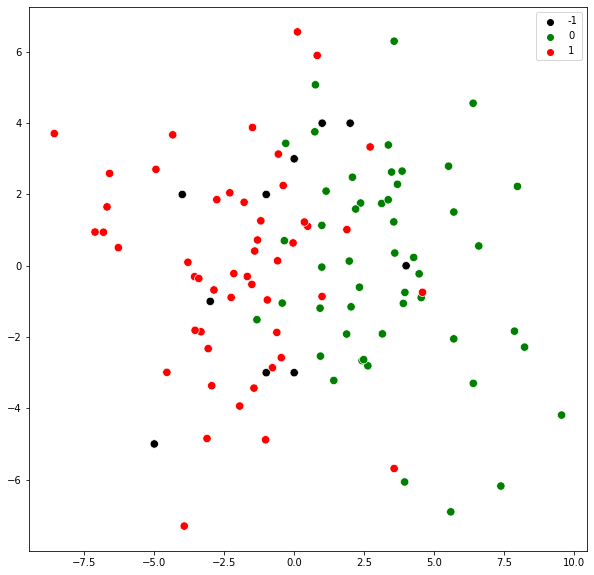

In [27]:
fig, ax = pyplot.subplots(figsize=[10,10])
X_both = np.vstack((X, X_test))
y_both = np.append(y, np.array([-1 for _ in range(number_of_test_points)]))
sns.scatterplot(x=X_both[:,0], y=X_both[:,1], hue=y_both, palette={1: 'red', 0: 'green', -1: 'black'}, s=70, ax=ax)

In [28]:
knn = KNN(k_neighbors = 3, distance_func=euclidean_distances, choice_func=mode_choice)
knn.fit(X, y)
y_hat, k_neighbors = knn.predict(X_test)

In [29]:
for idx, point in enumerate(X_test):
    print(f"Point {point} - class {y_hat[idx]}, nearest neighbors {np.array(k_neighbors[idx])[:,2]}")

Point [0 3] - class 1, nearest neighbors [0. 1. 1.]
Point [4 0] - class 0, nearest neighbors [0. 0. 0.]
Point [-5 -5] - class 1, nearest neighbors [1. 1. 1.]
Point [-4  2] - class 1, nearest neighbors [1. 1. 1.]
Point [1 4] - class 0, nearest neighbors [0. 0. 0.]
Point [-3 -1] - class 1, nearest neighbors [1. 1. 1.]
Point [ 0 -3] - class 1, nearest neighbors [1. 1. 0.]
Point [-1 -3] - class 1, nearest neighbors [1. 1. 1.]
Point [-1  2] - class 1, nearest neighbors [1. 1. 1.]
Point [2 4] - class 0, nearest neighbors [1. 0. 0.]


### Implementation check

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X,y)
predicted= model.predict(X_test)
print(f"Predicted from KNeighborsClassifier: {predicted}. \nPredicted from current implementation {y_hat}")
assert np.allclose(predicted, y_hat), "Current implementation doesn't match KNeighborsClassifier"

Predicted from KNeighborsClassifier: [1 0 1 1 0 1 1 1 1 0]. 
Predicted from current implementation [1 0 1 1 0 1 1 1 1 0]


### Testing the classification problem with real data

In [131]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score

In [43]:
breast_cancer = load_breast_cancer(as_frame=True)

In [ ]:
# View on data

In [46]:
breast_cancer.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [47]:
breast_cancer.data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# Looking at features distributions

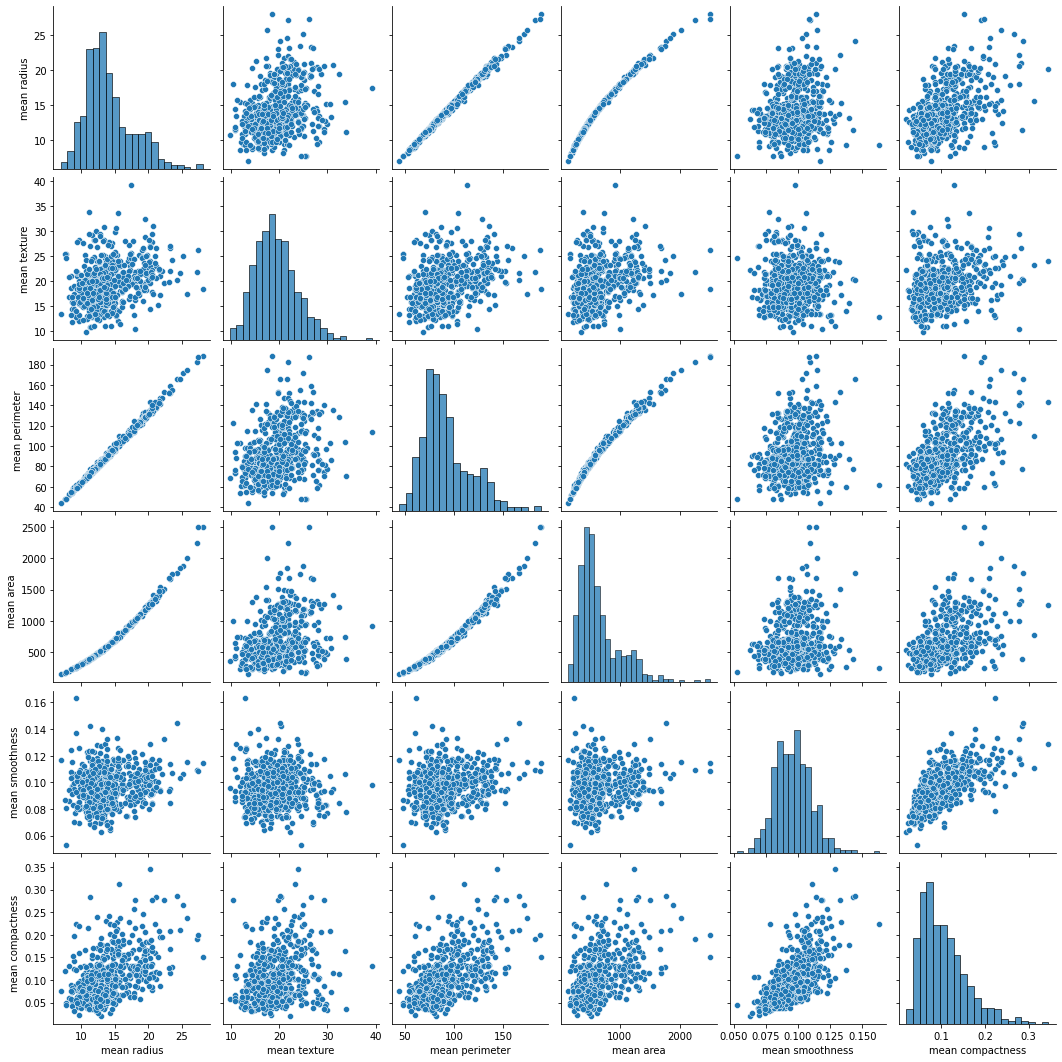

In [83]:
sns.pairplot(data=breast_cancer.data.loc[:, 'mean radius':'mean compactness'])

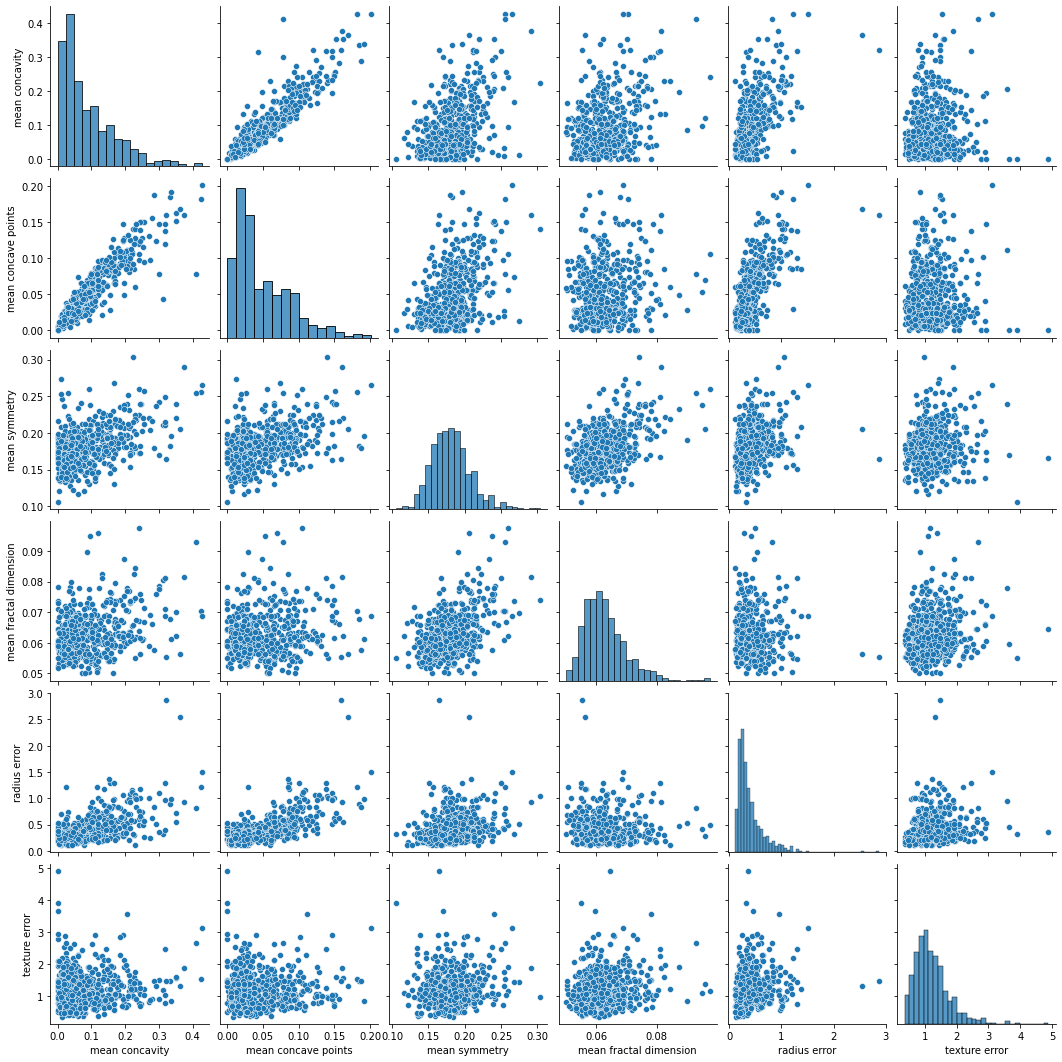

In [84]:
sns.pairplot(data=breast_cancer.data.loc[:, 'mean concavity':'texture error'])

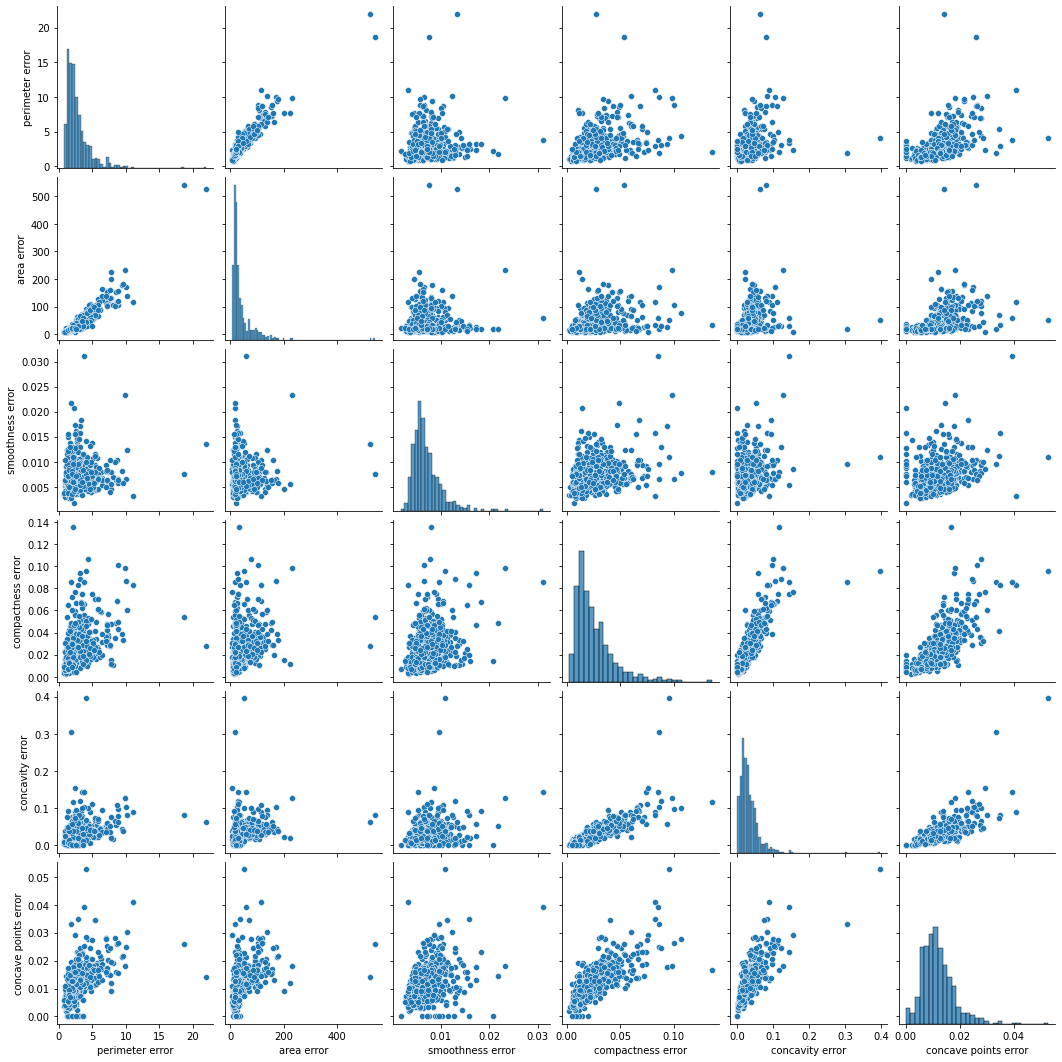

In [85]:
sns.pairplot(data=breast_cancer.data.loc[:, 'perimeter error':'concave points error'])

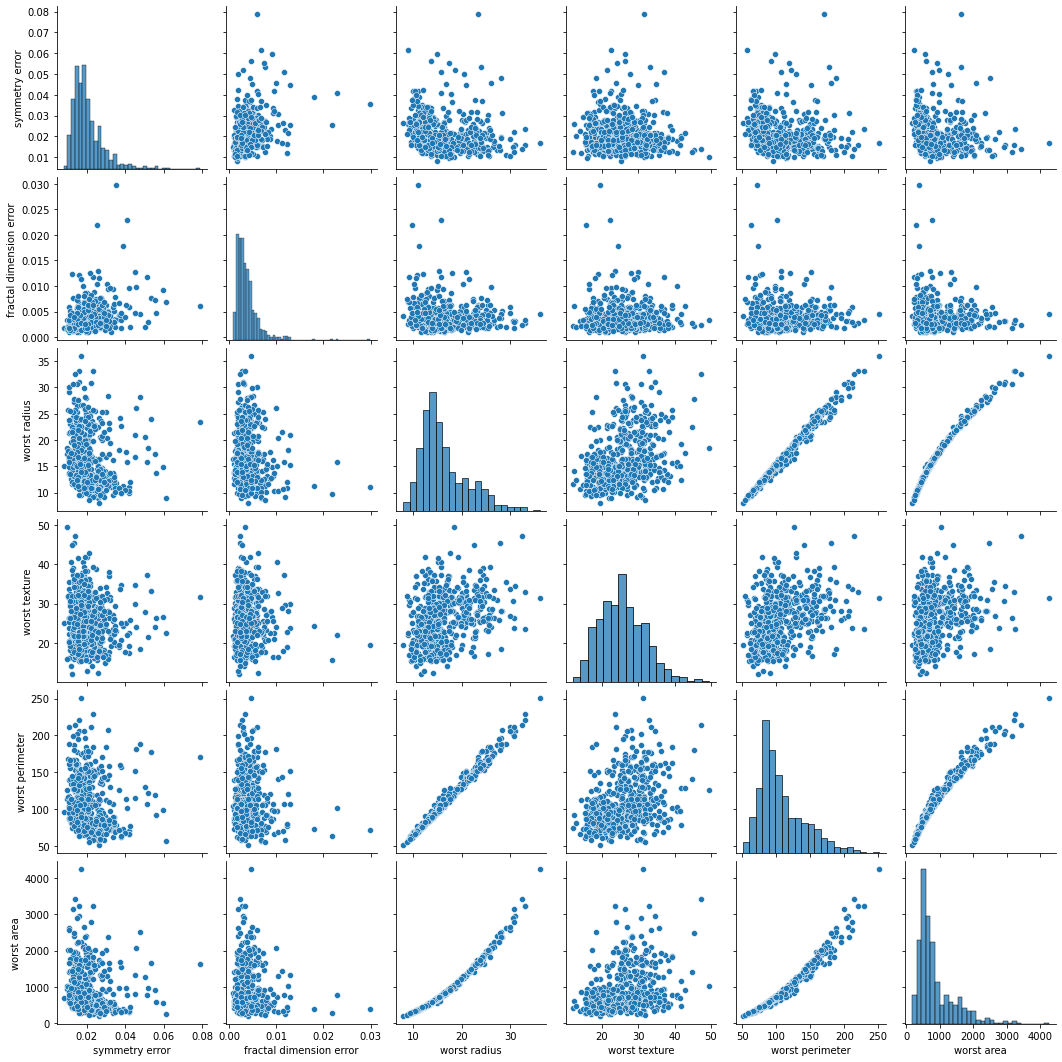

In [86]:
sns.pairplot(data=breast_cancer.data.loc[:, 'symmetry error':'worst area'])

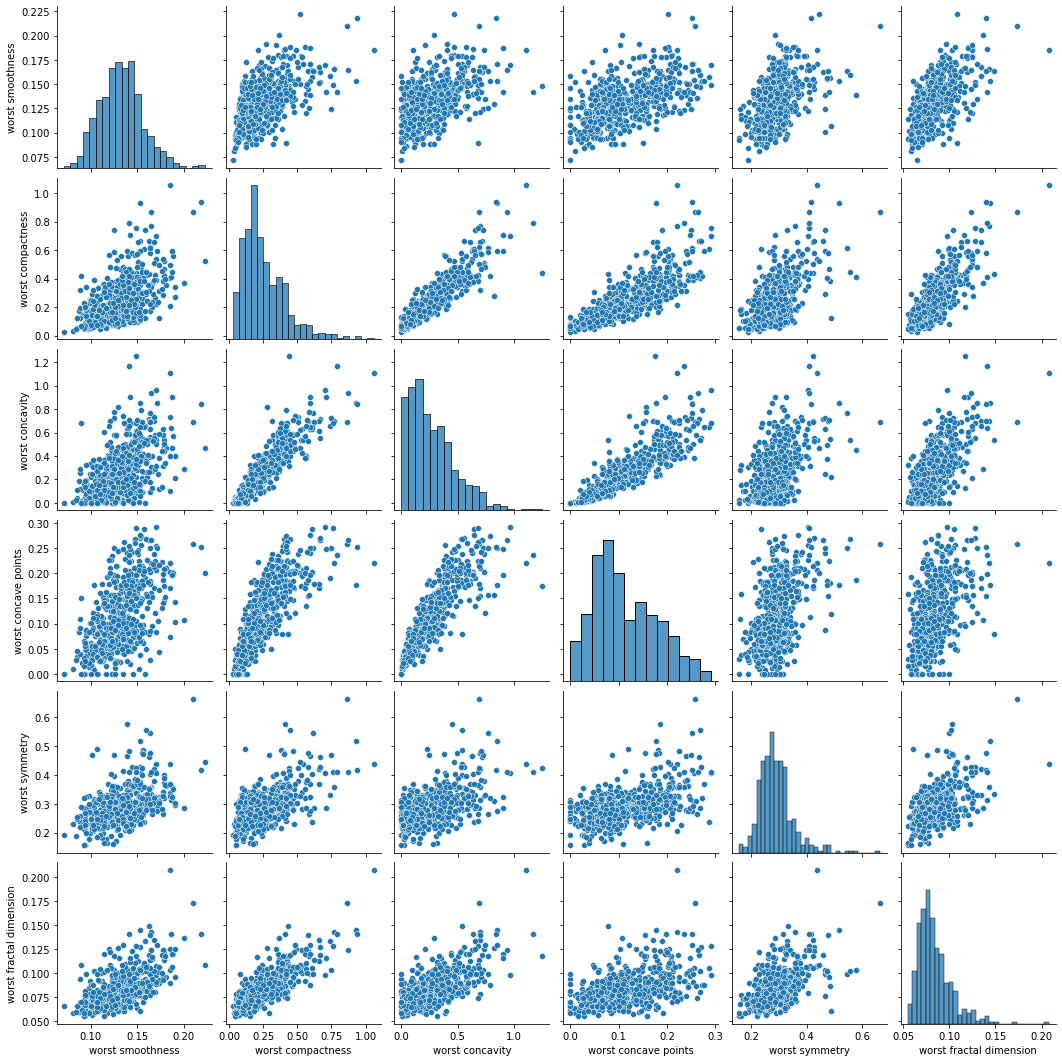

In [87]:
sns.pairplot(data=breast_cancer.data.loc[:, 'worst smoothness':'worst fractal dimension'])

In [120]:
data_df = breast_cancer.data
target_df = breast_cancer.target
y = target_df.tolist()

In [141]:
# Not all features have a normal distribution, so features with a normal distribution 
# will standardize using StandardScaler and the rest of the features using MinMaxScaler

In [142]:
col_for_standard_scaler = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'texture error', 'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concave points',
       'worst symmetry', 'worst fractal dimension']
col_for_maxmin_scaler = ['mean concavity', 'radius error', 'perimeter error', 'area error', 'worst concavity']

In [143]:
std_scaler = StandardScaler()
X = std_scaler.fit_transform(data_df.loc[:,col_for_standard_scaler])
mm_scaler = MinMaxScaler()
X = np.hstack((X, mm_scaler.fit_transform(data_df.loc[:,col_for_maxmin_scaler])))

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [145]:
knn = KNN(k_neighbors = 3, distance_func=euclidean_distances, choice_func=mode_choice)
knn.fit(X_train, y_train)
y_hat, k_neighbors = knn.predict(X_test)

In [146]:
print("Accuracy:", accuracy_score(y_test, y_hat))

Accuracy: 0.956140350877193
